Рассмотрим сложную математическую функцию на отрезке [1, 15]:
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

In [155]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import sin
from scipy import exp

In [168]:
def f(x):
    return np.array(sin (x / 5) * exp(x / 10) + 5 * exp(-x / 2))
print f(1.)
print f(15.)

3.252216865271419
0.6352214195786656


Берем многочлен первой степени w0 + w1*x = y

Подставляем в него x (1 и 15) и y (вычисляем f от x)

В точке 1 получаем: w0 + w1 * 1 = sin(1/5) * exp(1/10) + 5*exp(-1/2)
    
В точке 15 получаем: w0 + w1 * 15 = sin(15/5) * exp(15/10) + 5*exp(-15/2)

    
Получаем систему уравнений:
    
w0 + 1 * w1 = 3.252

w0 + 15 * w1 = 0.635


Решаем ее, w1 = -0.187, w0 = 3.439

Итоговый многочлен y = 3.439 - 0.187x


Создал матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15.

In [158]:
a1 = np.array([[1., 1.],
               [1., 15.]])
b1 = np.array([1., 15.])
b1 = f(b1)
c1 = scipy.linalg.solve(a1, b1)
print c1

[ 3.43914511 -0.18692825]


Построил график для многочлена 1-й степени, 
который совпадает с функцией f в точках 1 и 15

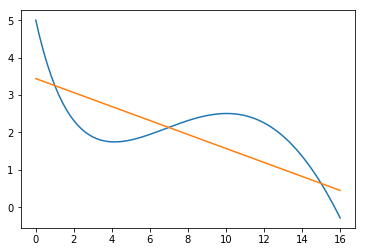

In [162]:
def f(x):
    return np.array(sin (x / 5) * exp(x / 10) + 5 * exp(-x / 2))
x = np.arange(0., 16.1, 0.1) 
y = f(x) 
plt.plot (x, y)

x = np.arange(0., 16.1, 0.1) 
y = c1[0] + c1[1]*x 
plt.plot (x, y)

для многочлена 2-й степени будет вот такое уравнение?

w0 + w1 * x + w2 * x^2 = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


Для точек 1, 8 и 15 получим:

w0 + w1 * 1 + w2*1^2 = sin(1 / 5) * exp(1 / 10) + 5 * exp(-1 / 2)

w0 + w1 * 8 + w2*8^2 = sin(8 / 5) * exp(8 / 10) + 5 * exp(-8 / 2)

w0 + w1 * 15 + w2*15^2 = sin(15 / 5) * exp(15 / 10) + 5 * exp(-15 / 2)


Система ур-й:

w0 + w1*1 + w2*1^2 = 3.25

w0 + w1*8 + w2*8^2 = 2.31

w0 + w1*15 + w2*15^2 = 0.63

Задал матрицу для многочлена 2-й степени, 
который совпадает с функцией f в точках 1, 8 и 15

In [151]:
a2 = np.array([[1., 1., 1.],
               [1., 8., 64.],
               [1., 15., 225.]])
b2 = np.array([1., 8., 15.])
b2 = f(b2)
c2 = scipy.linalg.solve(a2, b2)
print c2

[ 3.32512949 -0.06531159 -0.00760104]


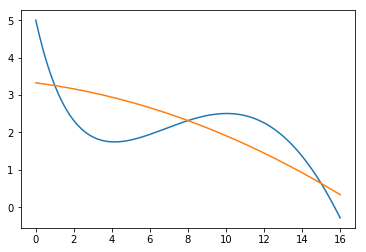

In [152]:
def f(x):
    return np.array(sin (x / 5) * exp(x / 10) + 5 * exp(-x / 2))
x = np.arange(0., 16.1, 0.1)
y = f(x)
plt.plot (x, y)

x = np.arange(0., 16.1, 0.1)
y = c2[0] + c2[1]*x + c2[2]*x*x
plt.plot (x, y)

Для точек 1, 4, 10 и 15

w0 + w1 * 1 + w2*1^2 + w3*1^3 = sin(1 / 5) * exp(1 / 10) + 5 * exp(-1 / 2)

w0 + w1 * 4 + w2*4^2 + w3*4^3 = sin(4 / 5) * exp(4 / 10) + 5 * exp(-4 / 2)

w0 + w1 * 10 + w2*10^2 + w3*10^3 = sin(10 / 5) * exp(10 / 10) + 5 * exp(-10 / 2)

w0 + w1 * 15 + w2*15^2 + w3*15^3 = sin(15 / 5) * exp(15 / 10) + 5 * exp(-15 / 2)

[[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000],[1, 15, 225, 3375]]


Система ур-й:

w0 + w1*1 + w2*1^2 +w3*1^3 = 3.25

w0 + w1*4 + w2*4^2 + w3*4^3 = 1.74

w0 + w1*10 + w2*10^2 + w3*10^3 = 2.50

w0 + w1*15 + w2*15^2 + w3*15^3 = 0.63


Задал матрицу для многочлена 3-й степени, 
который совпадает с функцией f в точках 1, 4, 10 и 15

In [163]:
a3 = np.array([[1., 1., 1., 1.], 
              [1., 4., 16., 64.], 
              [1., 10., 100., 1000.],
              [1., 15., 225., 3375.]])
b3 = np.array([1., 4., 10., 15.])
b3 = f(b3)
c3 = scipy.linalg.solve(a3, b3)
print c3

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


Построил графики для всех многочленов

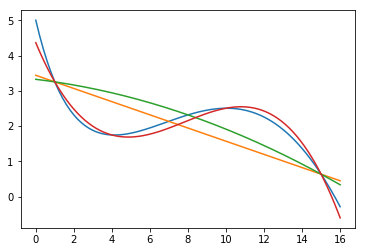

In [165]:
def f(x):
    return np.array(sin (x / 5) * exp(x / 10) + 5 * exp(-x / 2))
x = np.arange(0., 16.1, 0.1)
y = f(x)
plt.plot (x, y)

x = np.arange(0., 16.1, 0.1)
y = c0[0] + c0[1]*x
plt.plot (x, y)

x = np.arange(0., 16.1, 0.1)
y = c2[0] + c2[1]*x + c2[2]*x*x
plt.plot (x, y)

x = np.arange(0., 16.1, 0.1)
y = c3[0] + c3[1]*x + c3[2]*x*x + c3[3]*x*x*x
plt.plot (x, y)